In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from numpy import genfromtxt
data_path = '/content/gdrive/MyDrive/UIU/Miscellaneous/FYDP-II/Model/AllData2.csv'
balance_data = genfromtxt(data_path, delimiter=',')

In [2]:
import pandas as pd

balance_data = pd.read_csv(r'/content/gdrive/MyDrive/UIU/Miscellaneous/FYDP-II/Model/AllData2.csv')
print(balance_data)
len(balance_data)

     Student  D.Age  D.Gender  D.CommuteTime  D.LiveWithFamily  D.FamilySize  \
0          1     22         1              3                 2             6   
1          2     22         2              1                 1             5   
2          3     20         1              2                 1             4   
3          4     24         2              1                 2             5   
4          5     21         1              2                 2             3   
..       ...    ...       ...            ...               ...           ...   
195      196     21         1              4                 1             3   
196      197     21         1              3                 1             5   
197      198     21         2              1                 2             5   
198      199     21         2              1                 2             5   
199      200     20         2              2                 1             4   

     D.MotherQual  D.FatherQual  D.Pare

200

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn import svm
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB

classifiers = ['NaiveBayes',
               'LinearSVM',
               'LogisticRegression',
							 'DecisionTree',
               'KNeighbors']

models = [GaussianNB(),
          svm.SVC(kernel='linear'),
          LogisticRegression(max_iter = 1000),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier()]

def importdata():
	return balance_data

def splitdataset(balance_data):

	# Separating the target variable
	#X = balance_data.values[:, 1:5]
	#Y = balance_data.values[:, 6]

	X = balance_data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]].values
	Y = balance_data.iloc[:,46].values

	# encoding categorical data e.g. gender as a dummy variable
	from sklearn.preprocessing import LabelEncoder
	labelencoder_X = LabelEncoder()
	X[:,0] = labelencoder_X.fit_transform(X[:,0])
	X[:,1] = labelencoder_X.fit_transform(X[:,1])
	X[:,2] = labelencoder_X.fit_transform(X[:,2])
	X[:,3] = labelencoder_X.fit_transform(X[:,3])
	X[:,4] = labelencoder_X.fit_transform(X[:,4])
	X[:,5] = labelencoder_X.fit_transform(X[:,5])
	X[:,6] = labelencoder_X.fit_transform(X[:,6])
	X[:,7] = labelencoder_X.fit_transform(X[:,7])
	X[:,8] = labelencoder_X.fit_transform(X[:,8])
	X[:,9] = labelencoder_X.fit_transform(X[:,9])
	X[:,10] = labelencoder_X.fit_transform(X[:,10])
	X[:,11] = labelencoder_X.fit_transform(X[:,11])
	X[:,12] = labelencoder_X.fit_transform(X[:,12])
	X[:,13] = labelencoder_X.fit_transform(X[:,13])
	X[:,14] = labelencoder_X.fit_transform(X[:,14])
	X[:,15] = labelencoder_X.fit_transform(X[:,15])
	X[:,16] = labelencoder_X.fit_transform(X[:,16])
	X[:,17] = labelencoder_X.fit_transform(X[:,17])
	X[:,18] = labelencoder_X.fit_transform(X[:,18])
	X[:,19] = labelencoder_X.fit_transform(X[:,19])
	X[:,20] = labelencoder_X.fit_transform(X[:,20])
	X[:,21] = labelencoder_X.fit_transform(X[:,21])
	X[:,22] = labelencoder_X.fit_transform(X[:,22])
	X[:,23] = labelencoder_X.fit_transform(X[:,23])
	X[:,24] = labelencoder_X.fit_transform(X[:,24])
	X[:,25] = labelencoder_X.fit_transform(X[:,25])
	X[:,26] = labelencoder_X.fit_transform(X[:,26])
	X[:,27] = labelencoder_X.fit_transform(X[:,27])
	X[:,28] = labelencoder_X.fit_transform(X[:,28])
	X[:,29] = labelencoder_X.fit_transform(X[:,29])
	X[:,30] = labelencoder_X.fit_transform(X[:,30])
	X[:,31] = labelencoder_X.fit_transform(X[:,31])
	X[:,32] = labelencoder_X.fit_transform(X[:,32])
	X[:,33] = labelencoder_X.fit_transform(X[:,33])
	X[:,34] = labelencoder_X.fit_transform(X[:,34])
	X[:,35] = labelencoder_X.fit_transform(X[:,35])
	X[:,36] = labelencoder_X.fit_transform(X[:,36])
	X[:,37] = labelencoder_X.fit_transform(X[:,37])
	X[:,38] = labelencoder_X.fit_transform(X[:,38])
	X[:,39] = labelencoder_X.fit_transform(X[:,39])
	X[:,40] = labelencoder_X.fit_transform(X[:,40])
	X[:,41] = labelencoder_X.fit_transform(X[:,41])
	X[:,42] = labelencoder_X.fit_transform(X[:,42])
	X[:,43] = labelencoder_X.fit_transform(X[:,43])
	X[:,44] = labelencoder_X.fit_transform(X[:,44])

	#print(X)

	# Splitting the dataset into train and test
	X_train, X_test, y_train, y_test = train_test_split(
	X, Y, test_size = 0.3, random_state = 100)

	return X, Y, X_train, X_test, y_train, y_test

# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):

	print("Confusion Matrix: ",
		confusion_matrix(y_test, y_pred))

	print ("Accuracy : ",
	 accuracy_score(y_test,y_pred)*100)

	print("Report : ",
	 classification_report(y_test, y_pred))

def acc_score(df,label, X_train, X_test, Y_train, Y_test):
		Score = pd.DataFrame({"Classifier":classifiers})
		j = 0
		acc = []
		prec = []
		rec = []
    #X_train,X_test,Y_train,Y_test = split(df,label)
		for i in models:
				model = i
				model.fit(X_train,Y_train)
				predictions = model.predict(X_test)
				acc.append(accuracy_score(Y_test,predictions))
				prec.append(precision_score(Y_test,predictions,average='micro'))
				rec.append(recall_score(Y_test,predictions,average='micro'))
				j = j+1
		Score["Accuracy"] = acc
		Score["Precision"] = prec
		Score["Recall"] = rec
		Score.sort_values(by="Accuracy", ascending=False,inplace = True)
		Score.sort_values(by="Precision", ascending=False,inplace = True)
		Score.sort_values(by="Recall", ascending=False,inplace = True)
		Score.reset_index(drop=True, inplace=True)
		return Score





In [4]:
def main():
  data = importdata()
  X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

  score1 = acc_score(X,Y, X_train, X_test, y_train, y_test)
  print(score1)

if __name__=="__main__":
	main()

           Classifier  Accuracy  Precision    Recall
0           LinearSVM  0.900000   0.900000  0.900000
1  LogisticRegression  0.866667   0.866667  0.866667
2        DecisionTree  0.866667   0.866667  0.866667
3          NaiveBayes  0.550000   0.550000  0.550000
4          KNeighbors  0.450000   0.450000  0.450000


In [ ]:
def kmeanscluster(df,label, X_train, X_test, Y_train, Y_test):
  import matplotlib.pyplot as plt
  from sklearn.cluster import KMeans
  kmeans = KMeans(n_clusters=3)
  kmeans.fit(df)
  y_kmeans = kmeans.predict(df)
  plt.scatter(df[:, 0], df[:, 1], c=y_kmeans, s=50, cmap='viridis')
  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);


  print(y_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 1 1 1 1 2 1 2 0 2 1 1 1 2 0 0 2 2 1 2 2 2 2 2 1 2 2 2 1 2 2 2 0 2 2 1
 2 2 2 1 2 2 1 1 2 2 0 0 0 2 2 1 2 2 2 2 0 2 1 2 2 1 2 2 1 2 1 1 2 0 0 2 0
 2 0 2 2 0 2 2 2 2 0 0 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 2 0 2 0 2 0 2 2 0 2
 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 2 1 1 1 1 2 1 1 1 1 2 1 2 1
 1 1 2 2 1 1 1 1 1 0 0 2 0 2 0 2 2 0 2 2 2 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 2 0 2 0 2 2 0 2 2 2 2 0 0 2]


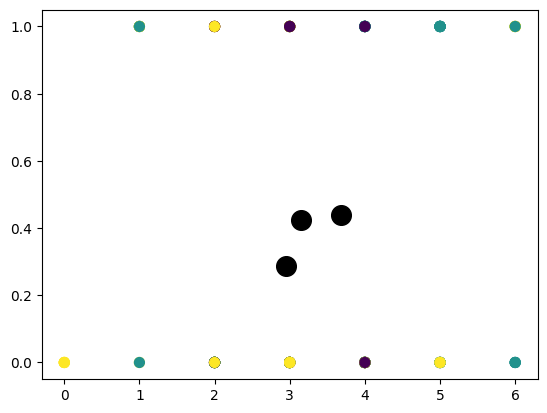

In [ ]:
def main():
  data = importdata()
  X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

  kmc=kmeanscluster(X, Y, X_train, X_test, y_train, y_test)

if __name__=="__main__":
	main()